# YOHO training

In [2]:
# Import used libraries

import pandas as pd
print("Pandas version: ", pd.__version__)

import torch
torch.manual_seed(0)

from utils import AudioFile, YOHODataset, YOHODataGenerator

Pandas version:  2.1.2


## Data generator

Number of audio files: 6000
Filepath: ./data/urbansed/audio/train/soundscape_train_bimodal0.wav
Duration: 10.0 seconds
Sampling rate: 44100 Hz
Mel spectrogram shape: (40, 1001)


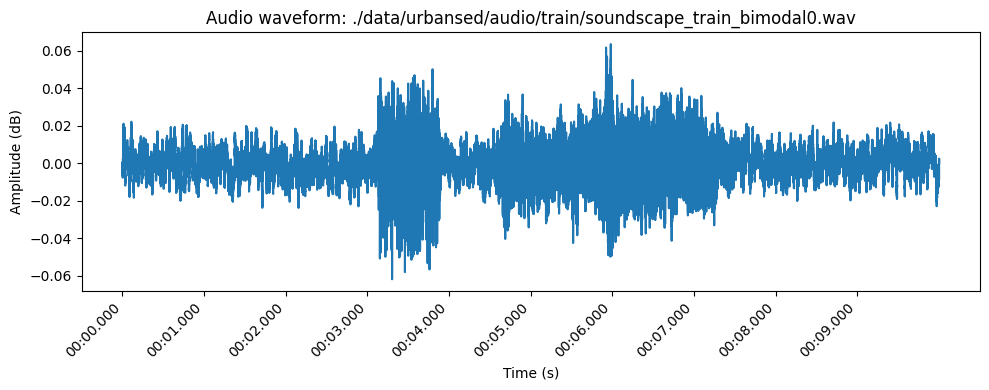

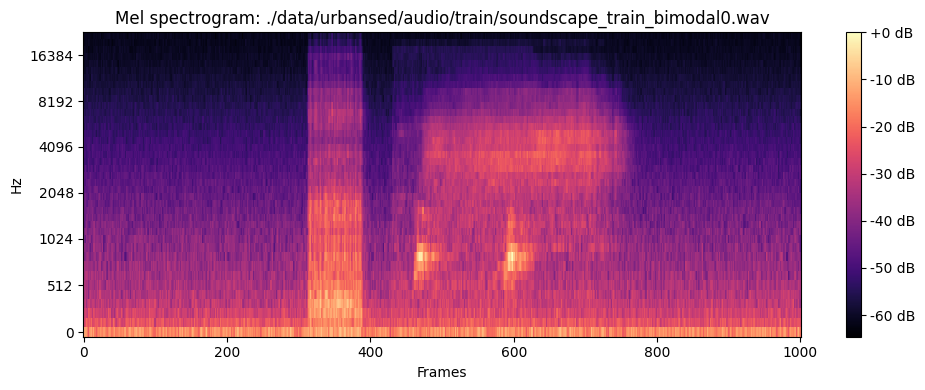

In [3]:
urbansed_df = YOHODataset(
    audios=[
        AudioFile(filepath=file.filepath, labels=file.events)
        for _, file in pd.read_csv("./data/urbansed.csv").iterrows()
    ],
    labels=[
        "air_conditioner",
        "car_horn",
        "children_playing",
        "dog_bark",
        "drilling",
        "engine_idling",
        "gun_shot",
        "jackhammer",
        "siren",
        "street_music",
    ],
    n_mels=40,
    hop_length=441,
    win_length=1764
)

print(f"Number of audio files: {len(urbansed_df)}")
print(f"Filepath: {urbansed_df.audios[0].filepath}")
print(f"Duration: {urbansed_df.audios[0].duration} seconds")
print(f"Sampling rate: {urbansed_df.audios[0].sr} Hz")
print(f"Mel spectrogram shape: {urbansed_df.audios[0].mel_spectrogram(n_mels=40, hop_length=441, win_length=1764).shape}")
urbansed_df.audios[0].plot()
urbansed_df.audios[0].mel_spectrogram(n_mels=40, hop_length=441, win_length=1764).plot()

In [4]:
train_dataloader = YOHODataGenerator(urbansed_df, batch_size=1, shuffle=True)

train_features, train_labels = next(iter(train_dataloader))
train_features, train_labels

(tensor([[[[ 1.0317,  1.3840,  1.3272,  ...,  1.4920,  1.4029,  0.9038],
           [ 0.3292,  0.4957,  0.5880,  ...,  1.4560,  1.2067,  0.7188],
           [ 0.1497,  0.3898,  0.4360,  ...,  1.1615,  1.1927,  0.9863],
           ...,
           [-1.6135, -1.4842, -1.5082,  ..., -1.4256, -1.3781, -1.6215],
           [-1.6726, -1.5634, -1.5387,  ..., -1.4535, -1.4115, -1.6390],
           [-1.6899, -1.5367, -1.5295,  ..., -1.4446, -1.4081, -1.6949]]]]),
 ("[('noise', 0, 10.0), ('street_music', 2.746415593304119, 5.572560610897536), ('jackhammer', 3.578242701949975, 5.962773700434363), ('car_horn', 4.852808255154279, 7.616477860260049), ('gun_shot', 5.596996277018889, 6.324215277018888), ('jackhammer', 6.076060595610772, 7.614903168559016), ('dog_bark', 6.710908004347111, 7.732751405172891), ('siren', 7.085406683277, 9.5606704776191), ('gun_shot', 7.210237848455257, 9.609737848455257), ('gun_shot', 8.03668790669237, 9.80668790669237)]",))

In [5]:
train_features, train_labels = next(iter(train_dataloader))
train_features, train_labels

(tensor([[[[ 1.4297,  1.8154,  1.7532,  ...,  1.6644,  1.4713,  1.2963],
           [ 0.6607,  0.8430,  0.9440,  ...,  0.9029,  1.0310,  0.9358],
           [ 0.4642,  0.7270,  0.7776,  ...,  0.7692,  0.7021,  0.7712],
           ...,
           [-1.4661, -1.3245, -1.3507,  ..., -1.3238, -1.3181, -1.4996],
           [-1.5308, -1.4112, -1.3842,  ..., -1.3901, -1.4090, -1.5199],
           [-1.5496, -1.3820, -1.3741,  ..., -1.3528, -1.3584, -1.5814]]]]),
 ("[('noise', 0, 10.0), ('siren', 2.1688161435155937, 3.708788645004307), ('engine_idling', 4.957180390568066, 5.815470695198912), ('engine_idling', 5.132277516634661, 6.33779061494837), ('jackhammer', 5.399908538681259, 6.027716925087238), ('street_music', 9.249252610765392, 9.833070734254035)]",))